In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.DataFrame(pd.read_csv("./PR_HW2_blob_train.csv"))
df_test  = pd.DataFrame(pd.read_csv("./PR_HW2_blob_test.csv"))

X_train = df_train[['Feature1', 'Feature2']].to_numpy()
y_train = df_train[['Target']].to_numpy().ravel()

X_test = df_test[['Feature1', 'Feature2']].to_numpy()
y_test = df_test[['Target']].to_numpy().ravel()

In [15]:
mean = np.zeros((3, 2))
for i in range(3):
    mean[i] = np.mean(X_train[y_train == i], axis=0)

s_w = np.zeros((2, 2))
for i, class_mean in enumerate(mean):
    A = X_train[y_train == i] - class_mean
    AT = A.T
    s_w += AT.dot(A)
print(s_w)    

s_b = np.zeros((2, 2))
overall_mean = np.mean(X_train, axis = 0)
for i, class_mean in enumerate(mean):
    A = X_train[y_train == i] - overall_mean
    AT = A.T
    s_b += X_train[y_train == i].shape[0] / X_train.shape[0] * AT.dot(A)
print(s_b)    



eigvals, eigvecs = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))

idx = np.argsort(eigvals)[::-1]
proj_vec = eigvecs[:, idx[0]]

print(eigvals)
print(eigvecs)
print(idx)
slope =  proj_vec[1] / proj_vec[0]

[[1052.70745046  -12.5828441 ]
 [ -12.5828441   971.29686189]]
[[ 3263.00377967  5467.5401716 ]
 [ 5467.5401716  10811.7804937 ]]
[ 0.37646782 13.99123817]
[[-0.88581408 -0.44161781]
 [ 0.46404032 -0.89720327]]
[1 0]


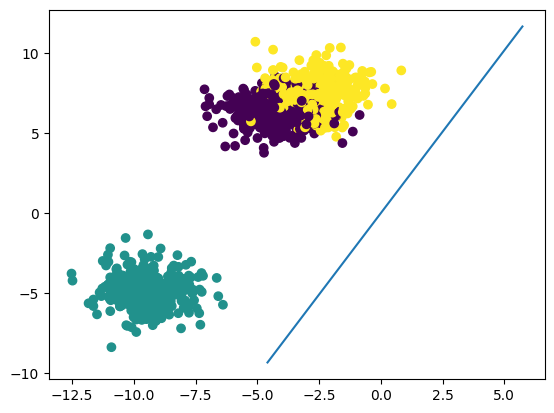

In [16]:
plt.scatter(X_train[:,0], X_train[:, 1], c = y_train)
ymin, ymax = plt.ylim()
y = np.arange(ymin, ymax, 0.01)
x = y / slope
plt.plot(x,y)

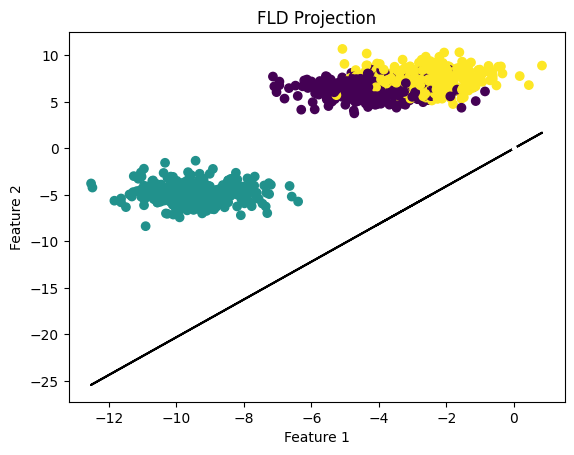

(array([-0.44161781, -0.89720327]), 13.929596528049856)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def fld(X_train, y_train):
    # Compute class means
    mean = np.zeros((3, 2))
    for i in range(3):
        mean[i] = np.mean(X_train[y_train == i], axis=0)
    
    # Compute within-class scatter matrix
    s_w = np.zeros((2, 2))
    for i, class_mean in enumerate(mean):
        A = X_train[y_train == i] - class_mean
        AT = A.T
        s_w += AT.dot(A)
        
    # Compute between-class scatter matrix
    s_b = np.zeros((2, 2))
    overall_mean = np.mean(X_train, axis=0)
    for i, class_mean in enumerate(mean):
        A = X_train[y_train == i] - overall_mean
        AT = A.T
        s_b += X_train[y_train == i].shape[0] / X_train.shape[0] * AT.dot(A)
    
    # Compute eigenvectors and eigenvalues of the product of the inverse of s_w and s_b
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))
    
    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    proj_vec = eigvecs[:, idx[0]]
    
    # Compute slope of projection line
    slope = proj_vec[1] / proj_vec[0]
    
    # Compute y-intercept of projection line
    y_intercept = overall_mean[1] - slope * overall_mean[0]
    
    # Compute projected data points
    X_proj = X_train.dot(proj_vec) / np.linalg.norm(proj_vec)
    
    # Plot original data points and projection line
    plt.figure()
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
    plt.plot(X_train[:, 0], slope * X_train[:, 0], color='black')
    plt.plot(0, 0, 'w.')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('FLD Projection')
    plt.show()
    
    return proj_vec, y_intercept
fld(X_train, y_train)

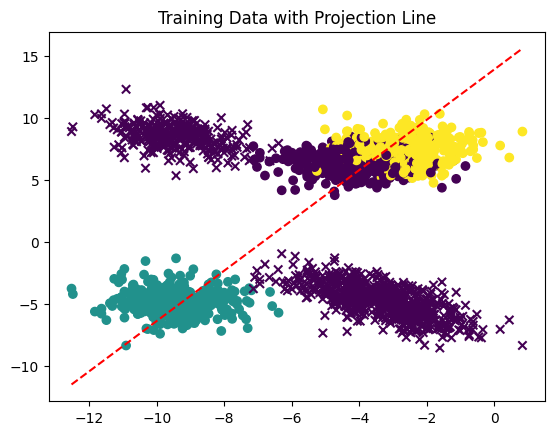

In [27]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Training Data with Projection Line')

proj_vec = proj_vec / np.linalg.norm(proj_vec)
x_coords = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
y_coords = proj_vec[1] / proj_vec[0] * (x_coords - np.mean(X_train[:, 0])) + np.mean(X_train[:, 1])

plt.plot(x_coords, y_coords, 'r--')

proj_train = X_train.dot(proj_vec)

for i in range(3):
    plt.scatter(X_train[y_train == i, 0], proj_train[y_train == i], c=y_train[y_train == i], marker='x')
        
plt.show()